# Transformação e Diferenciação

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 5

## Transformação 

- OBJETIVO = Transformar a série para que fique com uma distribuição aprocimadamente normal.
- JUSTIFICATIVA = Modelos ficam mais eficientes.

#### dataset

**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**


In [72]:
# obtendo os dados
dados = pd.read_csv('AirPassengers.csv', sep=',')
dados.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [73]:
# transformando em série
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

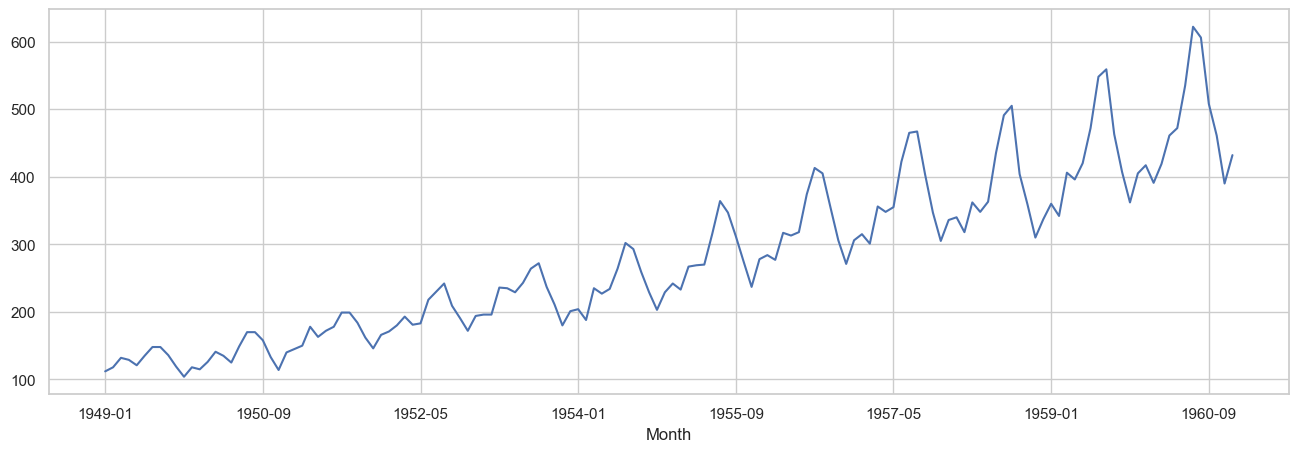

In [74]:
serie.plot() # tendência crescente e uma clara sazonalidade
plt.show()

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

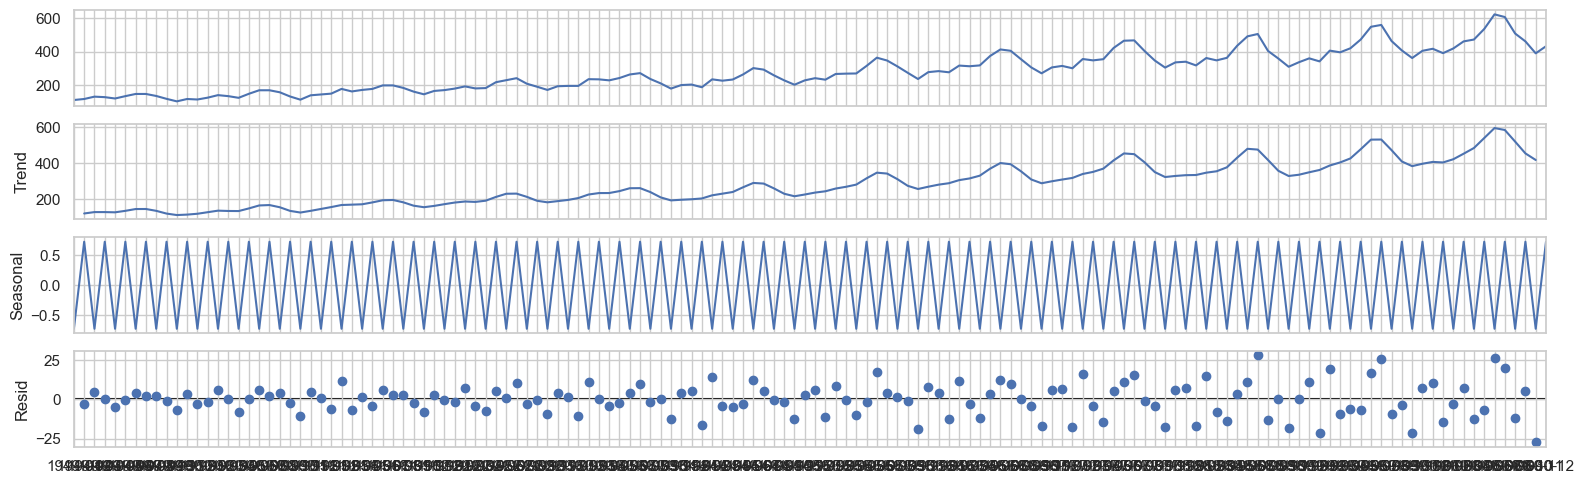

In [76]:
# analisando a tendência e sazonalidade especificamente
decomposicao = seasonal_decompose(serie, period=2)
decomposicao.plot();

In [77]:
import scipy.stats as stats

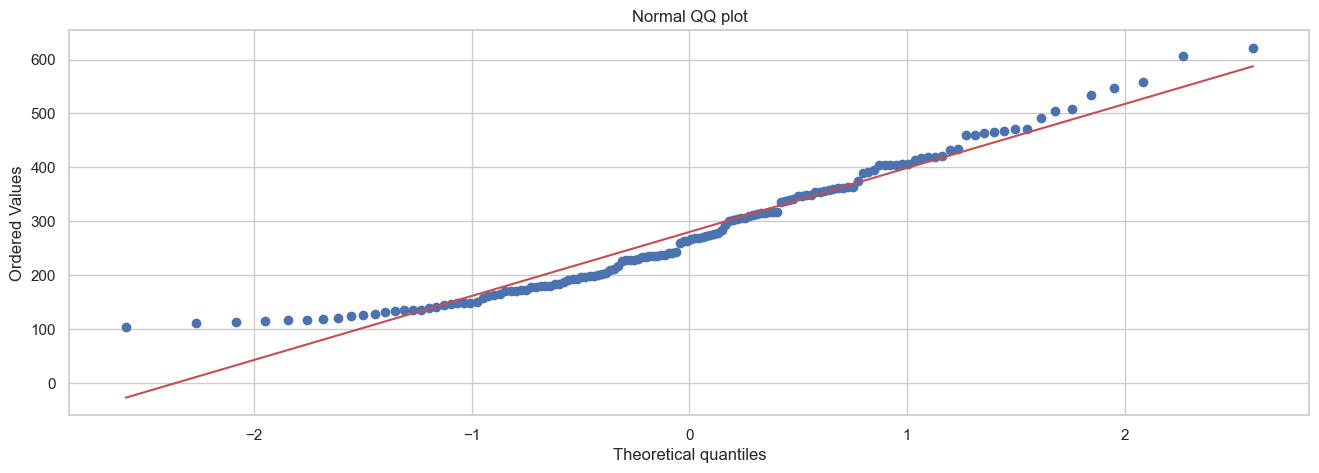

In [78]:
# verificando normalidade graficamente
stats.probplot(serie, dist='norm', plot=plt)
plt.title('Normal QQ plot')
plt.show()

Verificando normalidade numericamente

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [79]:
e, p = stats.shapiro(serie)
print(f'Estatística de teste: {e}')
print(f'p-valor: {p}') # menor q 0,05

Estatística de teste: 0.9519579410552979
p-valor: 6.832739018136635e-05


In [80]:
# Transformação por log
## Diminuindo variância para melhorar normalidade
serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

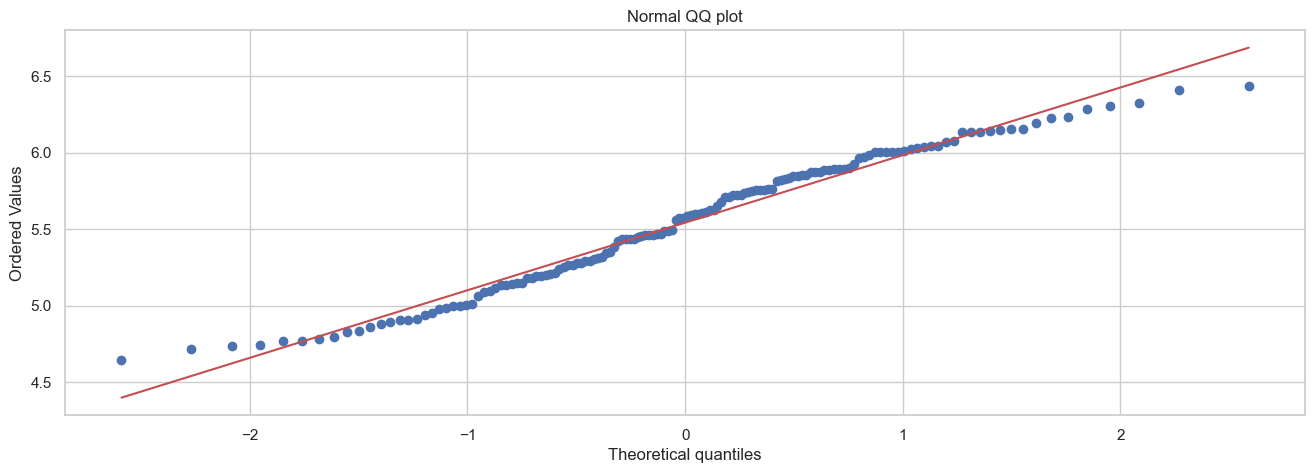

In [81]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show() # nitidamente melhorou!

In [82]:
e, p = stats.shapiro(serie2)
print(f'Estatística de teste: {e}')
print(f'p-valor: {p}') # ainda não é uma dist normal, mas já está melhor!

Estatística de teste: 0.9732357859611511
p-valor: 0.00637402106076479


In [83]:
# agora outra tranformação, por raiz cúbica
## quando possui dados com valor zero ou negativos

serie3 = np.sign(serie)*abs(serie)**(1/3) # extraindo raíz cúbica, com o cuidado para complexos. 
serie3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

In [84]:
# explicação da cédula anterior
print((27)**(1/3)) # raíz cúbica de 27

print((-27)**(1/3)) # número complexo

print(abs(-27)**(1/3)) # colocando a raíz do módulo, não dará número complexo

print(np.sign(-27)*abs(-27)**(1/3)) # fazendo o módulo e colocando o sinal posteriormente
print(np.sign(27)*abs(-27)**(1/3)) 

3.0
(1.5000000000000004+2.598076211353316j)
3.0
-3.0
3.0


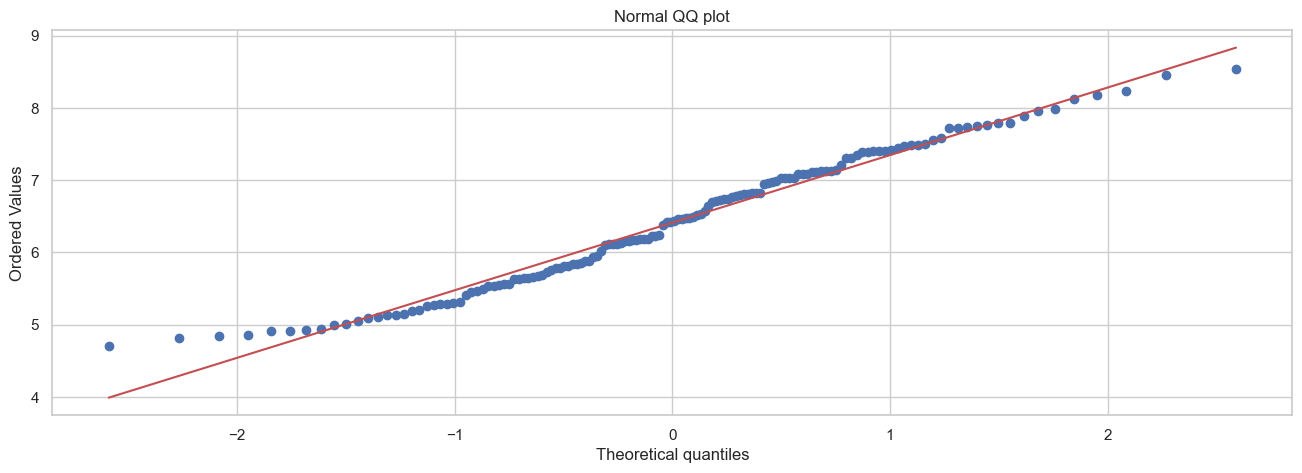

In [85]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show() 

In [86]:
e, p = stats.shapiro(serie3)
print(f'Estatística de teste: {e}')
print(f'p-valor: {p}') # novamente, ainda não é uma dist normal

Estatística de teste: 0.974599301815033
p-valor: 0.008835508488118649


C:\Users\Luiza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


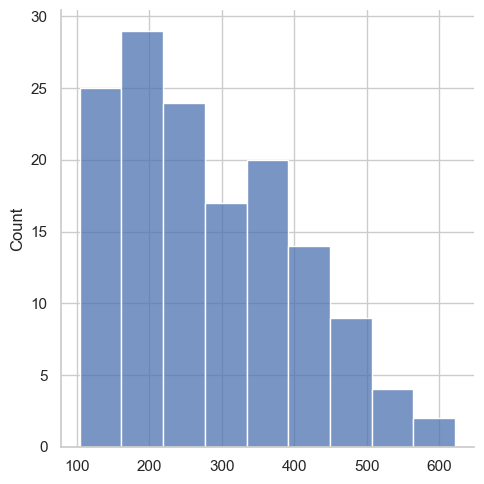

In [87]:
import seaborn as sns
sns.displot(serie); # histograma

C:\Users\Luiza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


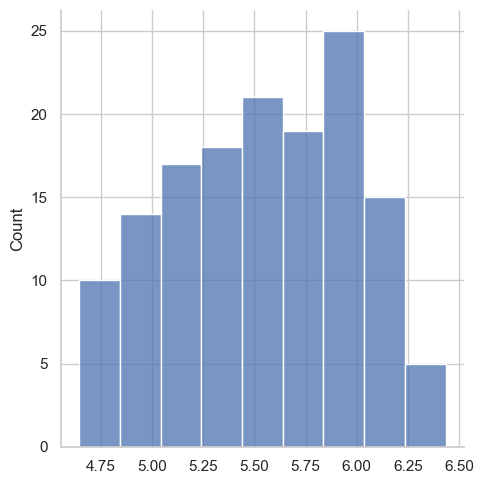

In [88]:
sns.displot(serie2); 

C:\Users\Luiza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


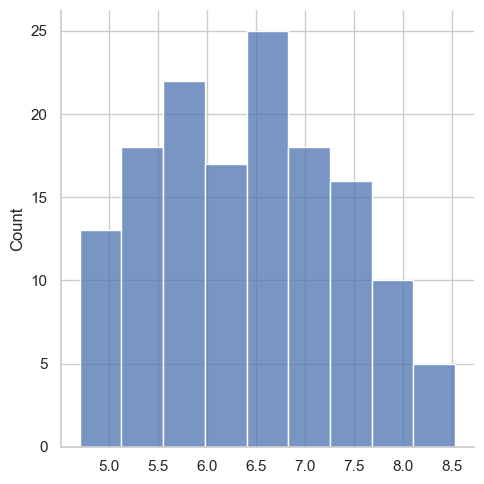

In [89]:
sns.displot(serie3);

## Diferenciação

- OBJETIVO: Transformar uma série não estacionária em estacionária.
- Diferença entre 2 períodos consecutivos.

In [90]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [91]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6735
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Luiza\AppData\Local\Temp\ipykernel_15604\1748613426.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie3)


Teste df (Dickey Fuller)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [92]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -0.8100
p_valor: 0.81615655
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788


In [93]:
# fazendo a diferenciação
serie4 = np.diff(serie3)

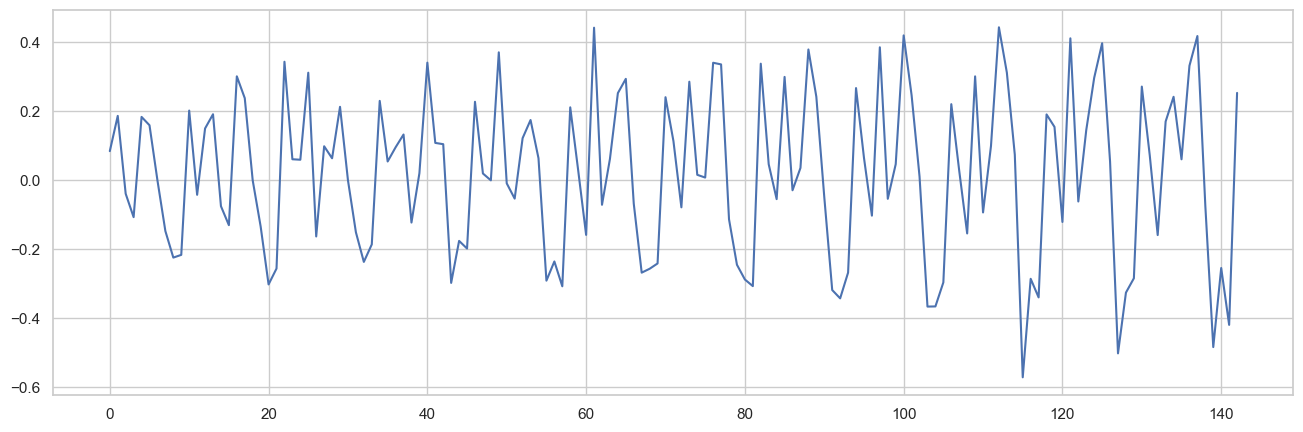

In [94]:
plt.plot(serie4) # mostrando após diferenciação
plt.show()

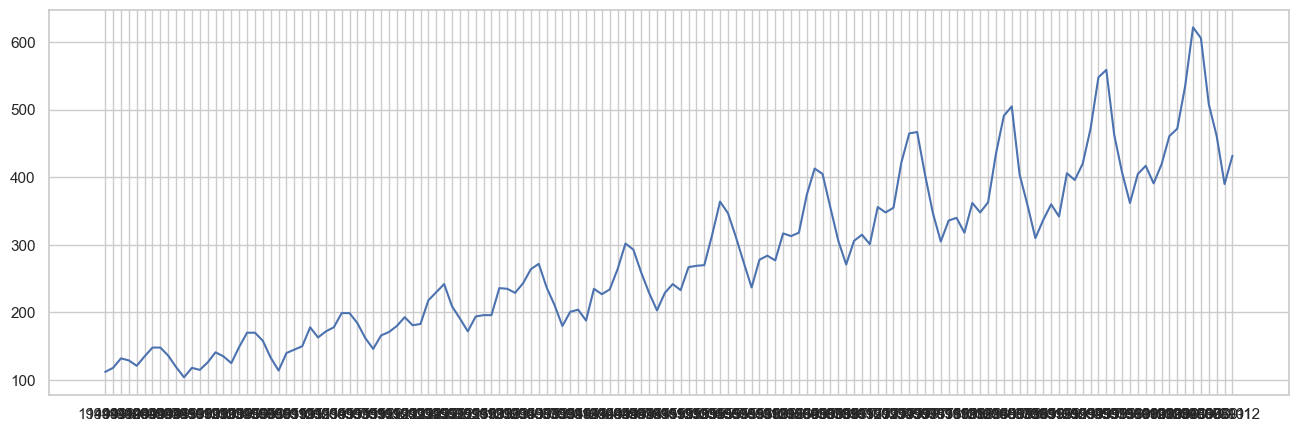

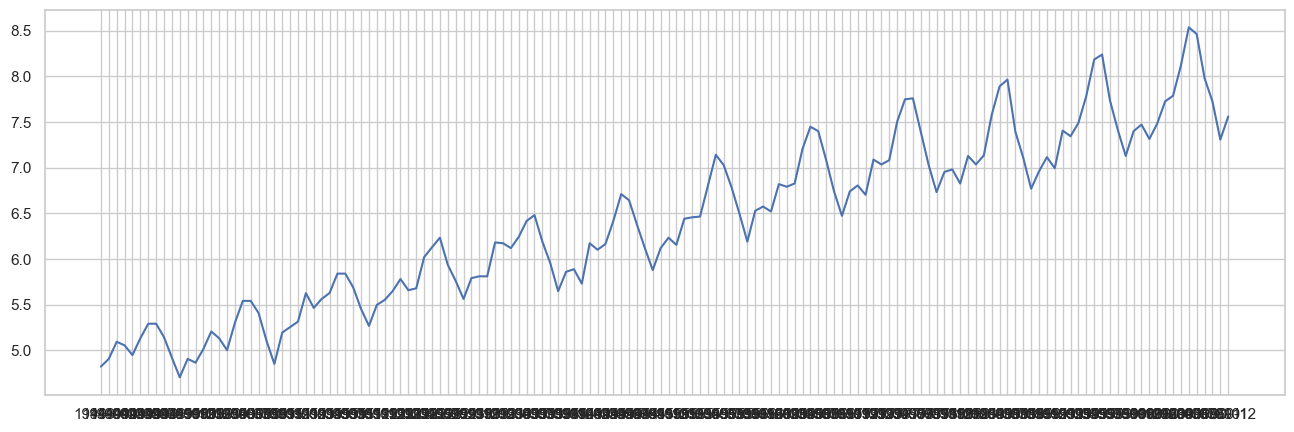

In [95]:
# comparando séries anteriores a diferenciação
plt.plot(serie) 
plt.show()
plt.plot(serie3) 
plt.show()

In [96]:
# cálculo da Diferenciação
## subtração da série por um valor antecessor dela mesma
serie_diff = serie3 - serie3.shift() # série - antecessor

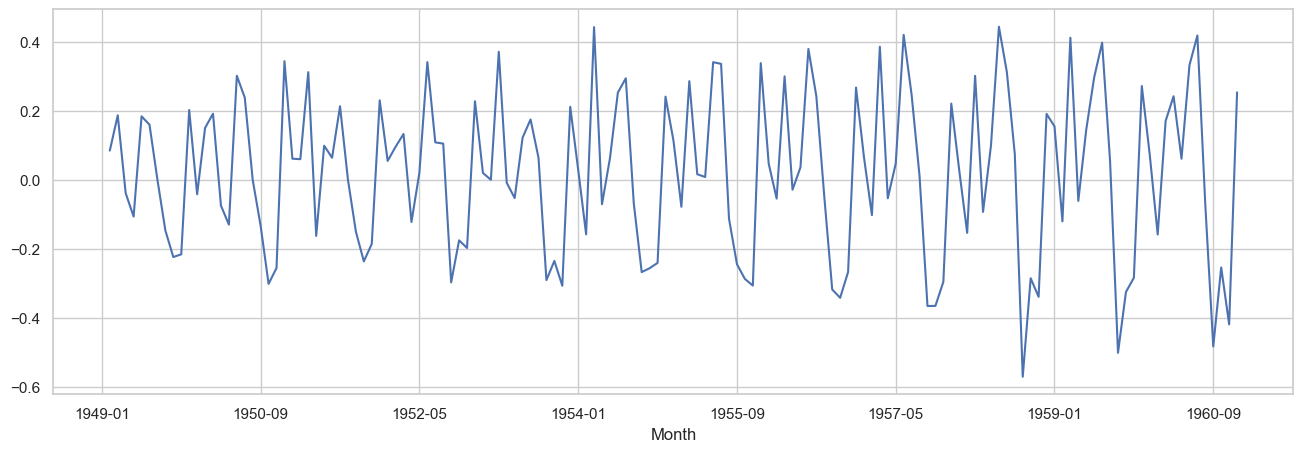

In [97]:
serie_diff.plot()
plt.show()

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [98]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0266
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Luiza\AppData\Local\Temp\ipykernel_15604\3851743177.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie4)


In [99]:
# diferenciação de segunda ordem
serie5 = np.diff(serie4)

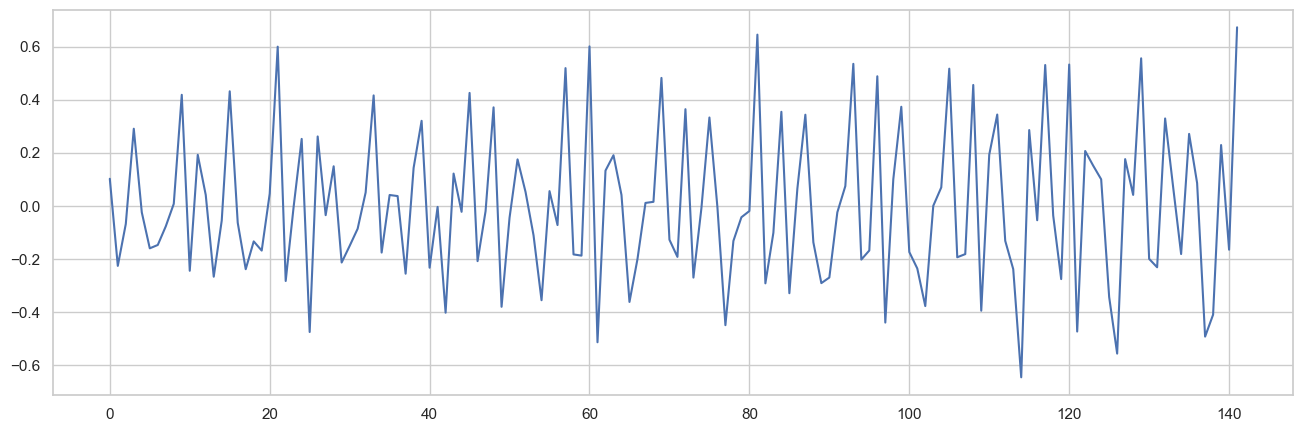

In [100]:
plt.plot(serie5)
plt.show()

In [101]:
kpss = statsmodels.tsa.stattools.kpss(serie5)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0762
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Luiza\AppData\Local\Temp\ipykernel_15604\1100002076.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie5)
